In [ ]:
#open what is needed to open fits files 
from astropy.io import fits
#import numpy 
import numpy as np 
import sys
sys.path.append("../")

In [2]:
from pyACC.fits_wrapper import FitsManager


In [ ]:
input_file= "VIPERS_W1.fits.gz"

hdul = fits.open(input_file)

# Mostra le informazioni sul contenuto del file
hdul.info()

Filename: VIPERS_W1.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   ()      
  1  W1_SPECTRO_PDR2    1 BinTableHDU     77   60528R x 16C   [16A, 9A, 1D, 1D, 1E, 1E, 6A, 1J, 1E, 1E, 1E, 1J, 1J, 1E, 1E, 1J]   


In [12]:
input_file = "/home/asiat/astrocosmolib/test/VIPERS_W1.fits.gz"

In [13]:
vipers_w1 = FitsManager(input_file)

2025-03-18 16:30:15.848999 :: FitsManager :: INFO :: Fits open succesfully


In [14]:
vipers_w1.get_hdu_count()

2

In [15]:
vipers_w1.get_header(0)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2016-11-18T15:38:59' / file creation date (YYYY-MM-DDThh:mm:ss UT)   

In [19]:
data = vipers_w1.get_data(1)

print(data)


[('VIPERS 101121877', '101121877', 30.8151647, -5.974833 , 19.2464, 0.0034, 'W1P198', 4, 0.2096, 23.4, 26.2311, 2, 1, 0.       , 0.  ,  0)
 ('VIPERS 101122063', '101122063', 30.4001899, -5.9778899, 22.6929, 0.0493, 'W1P197', 3, 0.9226, 21.5,  2.9409, 2, 1, 0.       , 0.  , -2)
 ('VIPERS 101122068', '101122068', 30.4430395, -5.9775326, 21.4163, 0.0191, 'W1P197', 3, 1.0308,  2.4,  4.1758, 2, 1, 0.8647142, 1.  ,  1)
 ...
 ('VIPERS 127112087', '127112087', 38.3192349, -4.1734122, 21.496 , 0.0191, 'W1P060', 1, 0.6042,  4.4,  2.0935, 1, 1, 0.6652782, 0.99,  1)
 ('VIPERS 127112139', '127112139', 38.5773317, -4.1729878, 21.159 , 0.0142, 'W1P061', 1, 0.6525,  4.5,  2.4279, 1, 1, 0.2404999, 0.88,  1)
 ('VIPERS 127112147', '127112147', 38.5733829, -4.172948 , 22.107 , 0.0269, 'W1P061', 1, 1.0104,  9.5,  1.9901, 1, 1, 0.2523616, 0.81,  1)]


In [30]:
print(data.columns.names)


['id_IAU', 'num', 'alpha', 'delta', 'selmag', 'errselmag', 'pointing', 'quadrant', 'zspec', 'zflg', 'norm', 'epoch', 'photoMask', 'tsr', 'ssr', 'classFlag']


In [31]:
#if data is not None:
    # Le colonne per RA e DEC corrispondono agli **indici 2 e 3**
    #ra = data.field(2)  # Terza colonna -> Ascensione Retta
    #dec = data.field(3)  # Quarta colonna -> Declinazione

ra = data["alpha"]    # Ascensione Retta
dec = data["delta"]


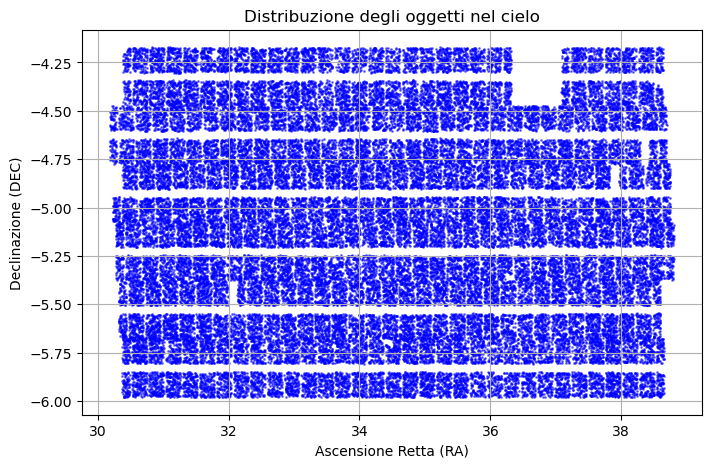

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 5))
plt.scatter(ra, dec, s=1, color='blue', alpha=0.5)
plt.xlabel("Ascensione Retta (RA)")
plt.ylabel("Declinazione (DEC)")
plt.title("Distribuzione degli oggetti nel cielo")
plt.grid(True)
plt.show()

In [25]:
zsp = data["zspec"]

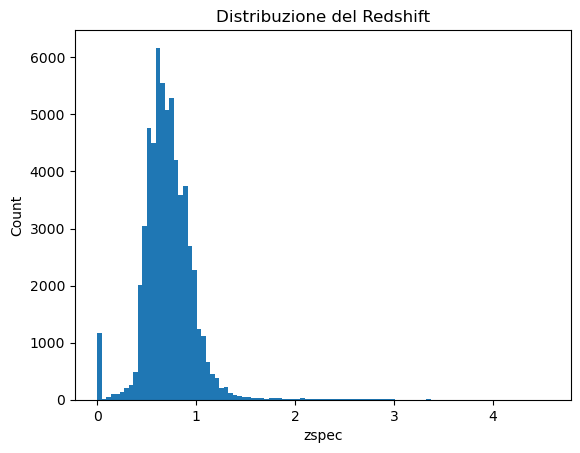

In [28]:
plt.hist(zsp, bins=100)
plt.xlabel("zspec")
plt.ylabel("Count")
plt.title("Distribuzione del Redshift")
plt.show()